<a href="https://colab.research.google.com/github/papagorgio23/Python101/blob/master/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example for Feature Selection

In [2]:
# load Packages
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Dataset

In [6]:
# load data
model_bet = pd.read_csv('https://raw.githubusercontent.com/papagorgio23/Python101/master/autoMLtest.csv')

# drop the day column (it's categorical and pointless for this example)
model_bet.drop(['day'],axis=1, inplace=True)

# mapping function to convert text Lose/Win to integer 0/1
convert_to_binary = {'Win' : 1, 'Lose' : 0}
model_bet['home.bet'] = model_bet['home.bet'].map(convert_to_binary)

# view dataset
model_bet.head()

,home.bet,home.line,over.under,Home.O.DVOA%,Home.O.Weighted.Offense%,Home.O.Pass.Off%,Home.O.Rush.Off%,Home.O.NotAdj.Total%,Home.O.NotAdj.Pass%,Home.O.NotAdj.Rush%,Home.O.Var%,Home.O.Schedule%,Home.D.DVOA%,Home.D.Weighted.Defense%,Home.D.Pass.Def%,Home.D.Rush.Def,Home.D.NotAdj.Total%,Home.D.NotAdj.Pass%,Home.D.NotAdj.Rush%,Home.D.Var%,Home.D.Schedule%,Home.D.WR1.DVOA,Home.D.WR1.Pa/G,Home.D.WR1.Yd/G,Home.D.WR2.DVOA,Home.D.WR2.Pa/G,Home.D.WR2.Yd/G,Home.D.WR3.DVOA,Home.D.WR3.Pa/G,Home.D.WR3.Yd/G,Home.D.TE.DVOA,Home.D.TE.Pa/G,Home.D.TE.Yd/G,Home.D.RB.DVOA,Home.D.RB.Pa/G,Home.D.RB.Yd/G,Home.ST.DVOA%,Home.ST.Weighted.DVOA%,Home.ST.FG/EP,Home.ST.Kick,...,Away.O.Rush.Off%,Away.O.NotAdj.Total%,Away.O.NotAdj.Pass%,Away.O.NotAdj.Rush%,Away.O.Var%,Away.O.Schedule%,Away.D.DVOA%,Away.D.Weighted.Defense%,Away.D.Pass.Def%,Away.D.Rush.Def,Away.D.NotAdj.Total%,Away.D.NotAdj.Pass%,Away.D.NotAdj.Rush%,Away.D.Var%,Away.D.Schedule%,Away.D.WR1.DVOA,Away.D.WR1.Pa/G,Away.D.WR1.Yd/G,Away.D.WR2.DVOA,Away.D.WR2.Pa/G,Away.D.WR2.Yd/G,Away.D.WR3.DVOA,Away.D.WR3.Pa/G,Away.D.WR3.Yd/G,Away.D.TE.DVOA,Away.D.TE.Pa/G,Away.D.TE.Yd/G,Away.D.RB.DVOA,Away.D.RB.Pa/G,Away.D.RB.Yd/G,Away.ST.DVOA%,Away.ST.Weighted.DVOA%,Away.ST.FG/EP,Away.ST.Kick,Away.ST.KickRet,Away.ST.Punt,Away.ST.PuntRet,Away.ST.Hidden.Pts,Away.ST.Weather.Pts,Away.ST.NonAdj.VOA
0,1,1.0,40.5,3.5,0.4,14.6,-0.5,2.1,13.3,-1.9,11.3,-2.3,-11.3,-10.8,-14.6,-8.0,-10.8,-11.1,-10.5,4.9,2.7,18.5,7.2,62.7,-13.3,5.9,46.8,41.4,4.6,44.1,-40.8,4.8,23.8,-4.8,6.2,35.0,-15.4,-17.3,-7.4,-31.0,...,1.5,1.1,13.8,-1.2,5.4,-2.9,-25.0,-28.1,-23.0,-27.4,-28.4,-30.8,-25.6,7.5,-4.2,-22.6,6.9,47.3,-7.5,5.5,37.9,-25.8,5.3,31.5,12.0,5.2,37.3,16.8,6.0,39.1,7.4,6.9,-0.6,0.0,12.4,14.5,10.5,-1.1,-2.8,6.8
1,1,-3.0,36.0,-1.2,2.0,5.3,4.2,-2.4,6.8,0.6,8.5,-2.0,-17.4,-15.6,-29.7,-2.7,-18.2,-30.9,-3.0,7.2,0.1,-33.9,7.2,47.9,-17.7,6.4,44.9,-63.2,3.8,18.9,4.8,6.3,44.8,-14.4,9.0,53.4,8.8,9.6,9.6,15.0,...,10.9,-7.5,-10.9,6.9,9.7,-1.0,18.1,19.1,20.8,15.7,20.4,26.1,15.2,8.1,3.8,11.2,7.3,71.8,6.2,4.9,49.2,-11.0,5.1,33.5,23.3,5.7,51.0,10.0,6.5,37.2,8.5,12.5,3.2,11.5,11.8,13.5,2.3,-0.6,-1.1,8.3
2,0,3.0,35.5,-4.4,-8.9,9.0,-13.1,-6.3,4.6,-11.8,6.0,-2.7,5.1,11.1,17.8,-8.0,6.7,20.4,-7.5,5.3,2.4,16.3,8.6,77.5,1.3,7.3,52.2,37.0,4.8,34.4,10.3,6.7,39.3,3.7,6.9,36.7,3.9,3.0,1.4,-0.5,...,6.9,5.5,9.2,8.9,8.4,1.2,-13.6,-11.0,-21.7,-2.1,-13.6,-22.5,-1.0,4.6,-1.1,-15.8,7.7,54.4,-20.3,7.6,56.8,-30.5,6.0,34.8,-11.2,6.0,30.0,-20.8,10.1,46.8,1.7,7.3,6.5,7.5,-3.9,-1.4,0.0,15.0,2.3,2.2
3,0,10.0,38.0,-29.3,-35.7,-34.1,-12.6,-31.2,-30.9,-21.1,13.5,-5.3,9.8,11.8,10.9,9.0,11.0,9.5,12.1,5.5,-0.2,13.6,7.7,64.6,22.7,7.4,60.7,0.0,4.1,29.5,1.6,4.8,42.5,19.4,5.9,33.1,-1.1,-2.0,0.1,-4.6,...,7.1,6.7,19.0,5.9,7.9,-2.7,2.6,-2.4,15.0,-10.4,-0.7,5.9,-7.5,10.8,-5.9,30.2,7.9,80.1,22.9,5.0,40.9,1.5,4.4,40.1,-4.5,4.4,24.9,10.0,6.8,40.2,-0.5,-2.1,9.2,2.6,-0.3,-5.4,-8.6,14.9,0.7,-0.4
4,0,3.0,37.0,7.9,9.2,-5.9,26.4,3.9,-4.8,18.2,5.4,-6.1,-11.8,-11.7,-9.1,-14.8,-13.9,-13.0,-14.8,9.2,-6.0,-21.6,10.2,67.6,3.9,7.4,48.9,-16.3,3.8,25.7,12.9,4.5,37.5,-20.5,6.8,35.5,3.0,5.1,3.8,-10.6,...,9.9,-8.1,-14.5,8.4,9.2,-3.1,-23.8,-24.0,-14.8,-36.6,-28.3,-21.9,-37.4,3.6,-7.7,-11.3,7.7,65.3,-9.9,7.3,48.7,-23.2,4.5,26.5,0.5,4.4,26.8,-14.0,8.9,49.8,8.4,11.6,14.3,4.6,0.2,4.4,18.4,3.7,-5.2,7.3


## Feature Selection Functions

In [0]:
# Univariate Selection
def featureScores(X, y, target, count, title):

    # apply SelectKBest class to extract top features
    bestfeatures = SelectKBest(k=count)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)

    # concat two dataframes for better visualization
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  # naming the dataframe columns

    print(str(target) + " top " + str(count) + " feature scores for our " + title + " model")
    print(featureScores.nlargest(count,'Score'))  # print best features


# Feature importance
def featureImportance(X, y, target, count, title):

    model = ExtraTreesClassifier()
    model.fit(X,y)
    #print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)


    f, ax = plt.subplots(figsize=(15, 15))

    feat_importances = feat_importances.sort_values(ascending=False)
    feat_importances = feat_importances.iloc[:count]

    sns.set_style("white")
    sns.set_color_codes("muted")
    sns.barplot(y=feat_importances.index, x=feat_importances.values, color="b")
    sns.despine(left=True, bottom=True)
    ax.set_title("Top " + str(count) + " features for our " + title + " Model", fontsize=20)
    ax.set_xlabel("Importance", fontsize=18)
    ax.set_ylabel("Feature", fontsize=18)

    plt.show()


# Correlation matrix
def correlationMatrix(df):
    
    corrmat = df.corr()
    top_corr_features = corrmat.index

    f, ax = plt.subplots(figsize=(30, 30))
    sns.heatmap(df[top_corr_features].corr(), linewidths=.5, cmap="YlGnBu")

    plt.show()


# Feature selection functions
def featureSelection(df, target, count, title):

    y = df[target]
    X = df.drop([target], axis = 1)

    featureScores(X, y, target, count, title)
    print()
    print('='*50)
    print()
    print()
    print()
    featureImportance(X, y, target, count, title)
    print()
    print('='*50)
    print()
    print()
    print()
    correlationMatrix(df)

# Feature Selection


Function Arguements

1.   Dataframe (df)
2.   Target Variable (target)
3.   Number of Variables to Return (count)
4.   Name of Your Model (title)



home.bet top 15 feature scores for our NFL Vegas Model model
                       Specs      Score
16       Home.D.NotAdj.Pass%  52.625330
15      Home.D.NotAdj.Total%  52.437008
46  Away.O.Weighted.Offense%  49.826911
12  Home.D.Weighted.Defense%  47.828465
23           Home.D.WR2.DVOA  45.486302
49      Away.O.NotAdj.Total%  45.335355
45              Away.O.DVOA%  44.588586
50       Away.O.NotAdj.Pass%  44.406253
47          Away.O.Pass.Off%  43.021134
11              Home.D.DVOA%  42.726863
13          Home.D.Pass.Def%  41.292705
3   Home.O.Weighted.Offense%  38.598449
6       Home.O.NotAdj.Total%  35.710219
7        Home.O.NotAdj.Pass%  35.295433
4           Home.O.Pass.Off%  34.279487






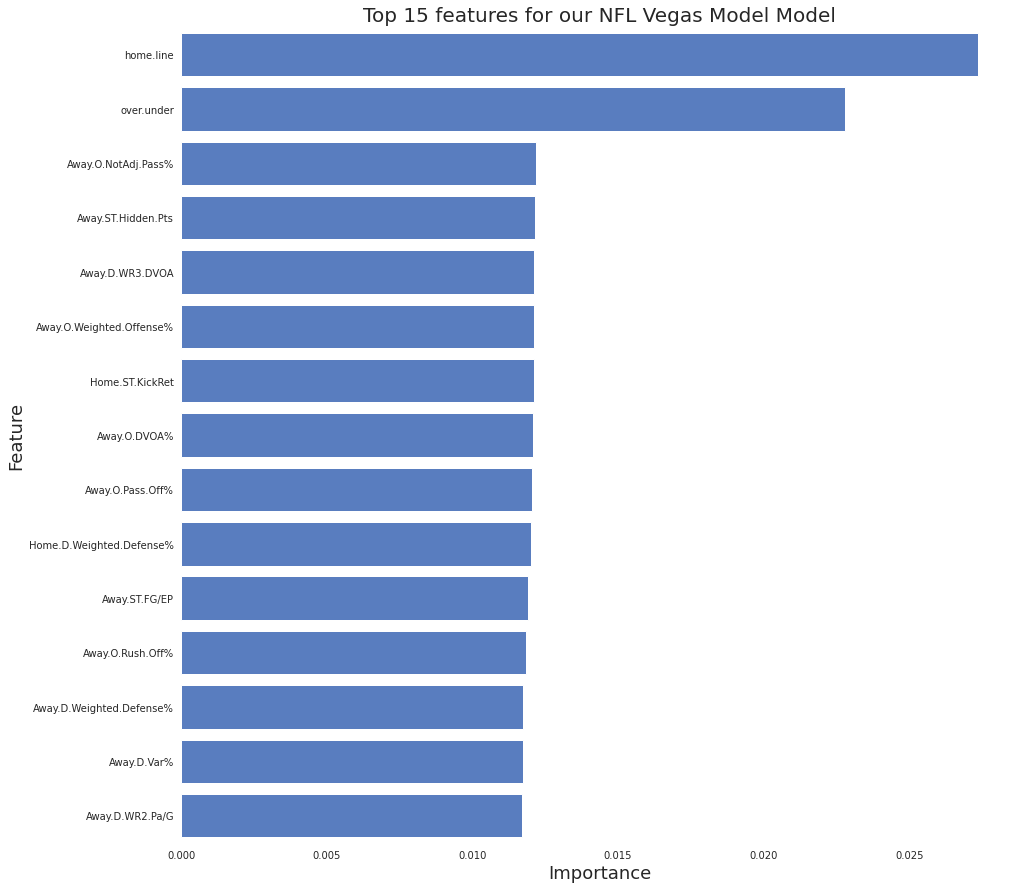

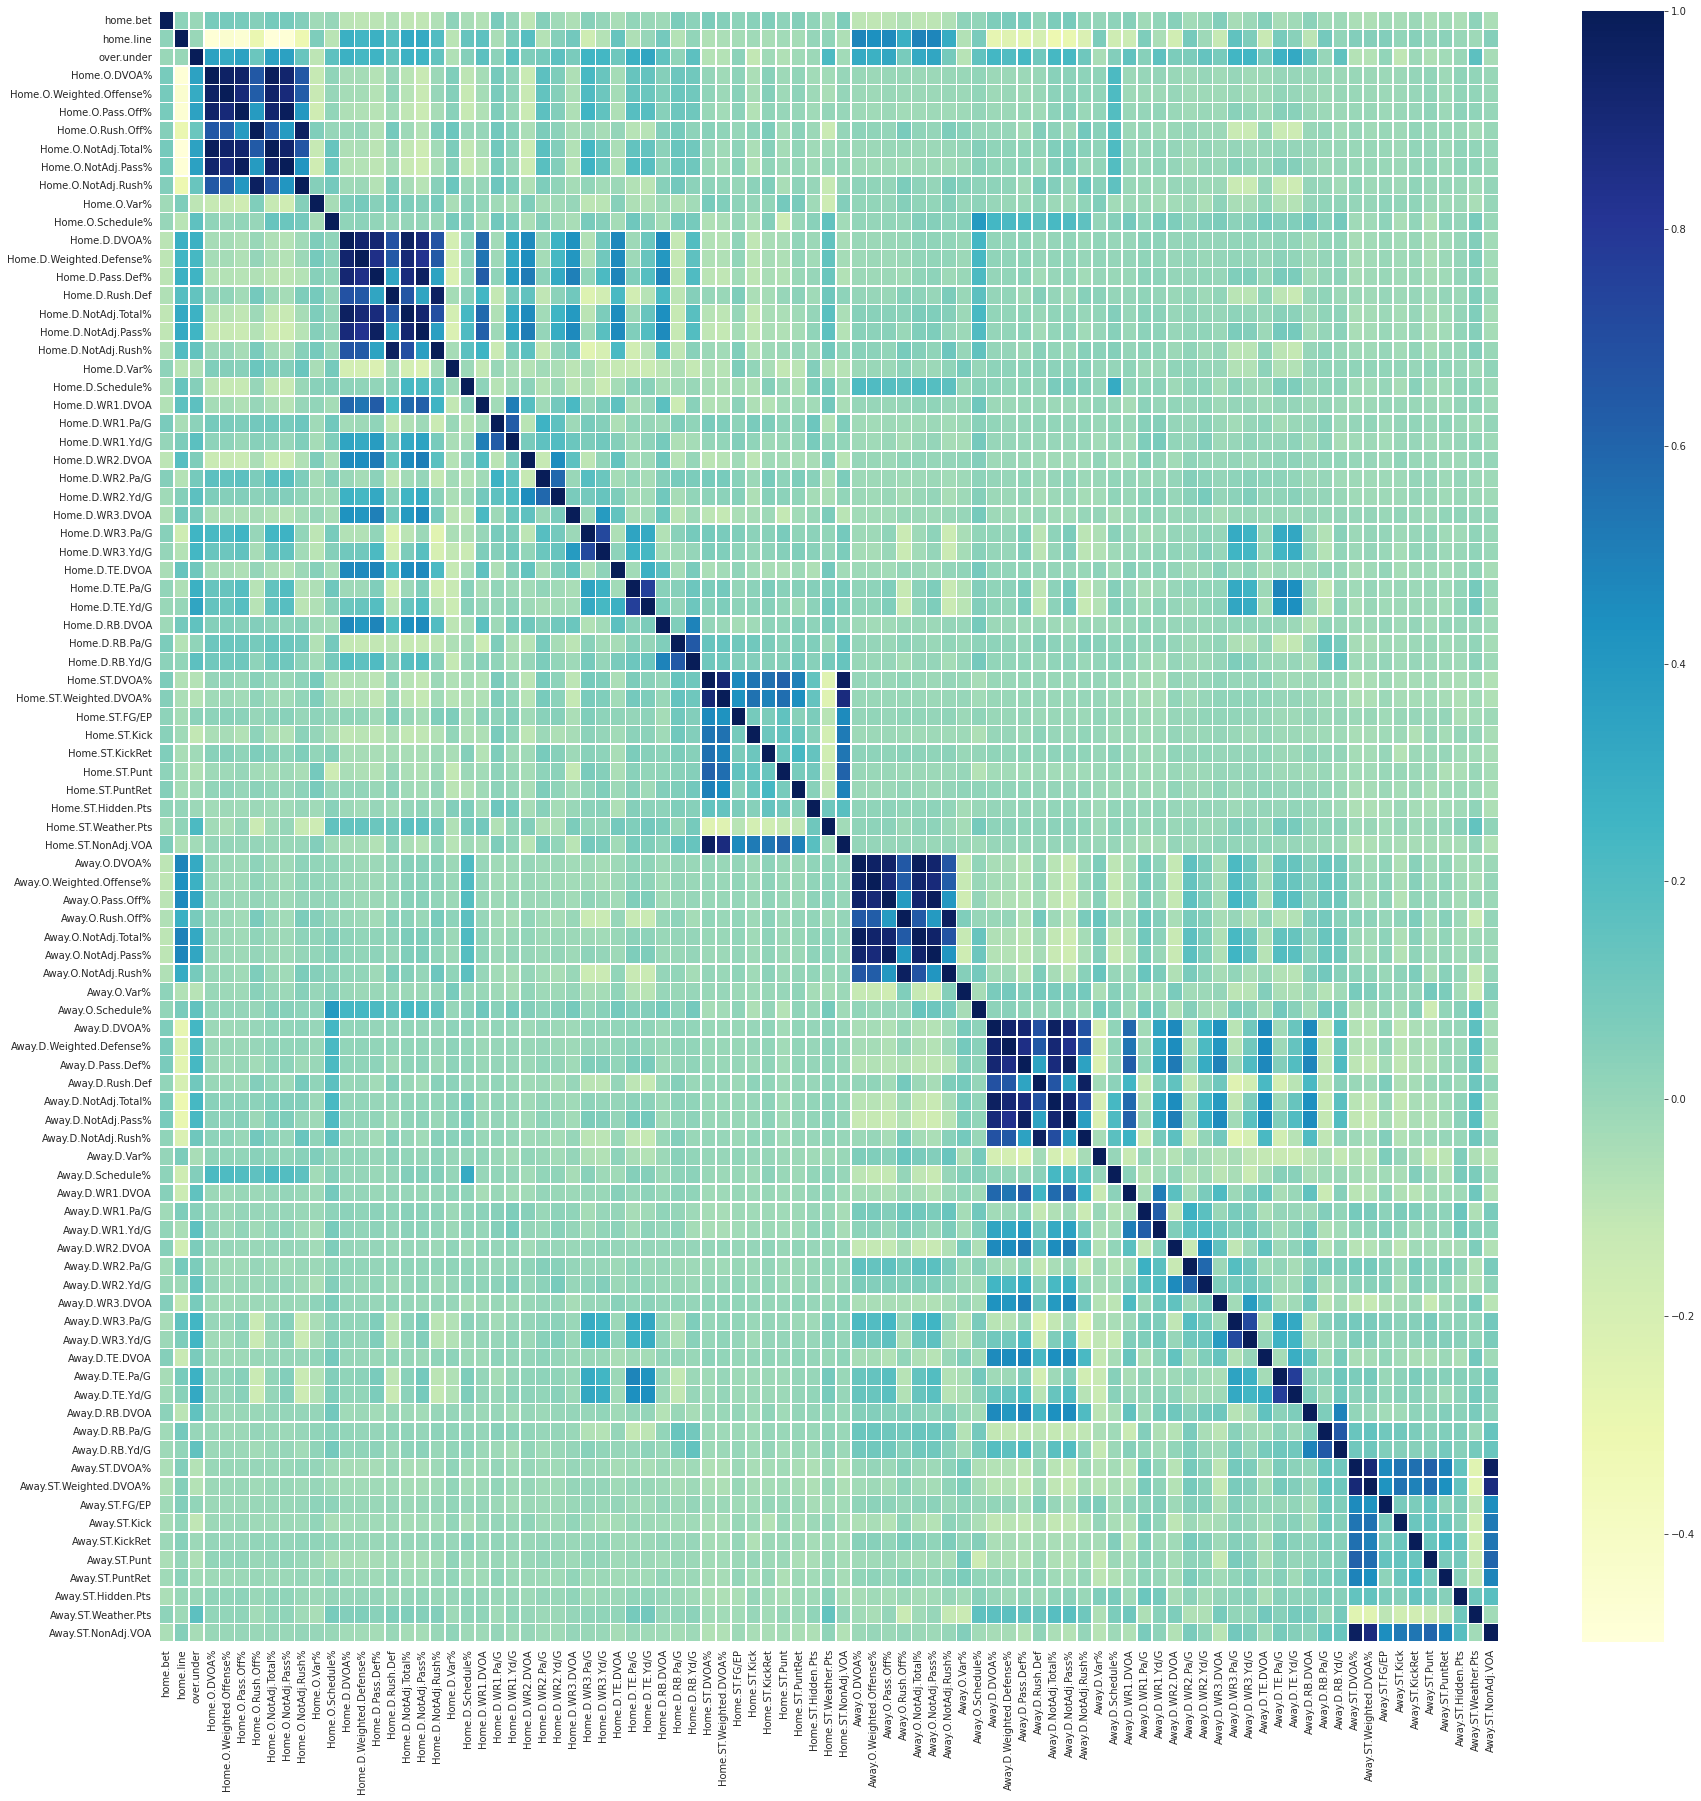

In [18]:
featureSelection(df = model_bet, target = 'home.bet', count = 15, title = 'NFL Vegas Model')